In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict
plt.style.use('ggplot') #otorgar estilo a los gráficos
from pandas.plotting import table

In [2]:
#Cargar Archivos
#from google.colab import files 
#files.upload()

In [3]:
data = pd.read_csv('videogamesales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Primeros análisis

Informacion que podemos analizar:
1.   Videojuego mas vendido / menos vendido por país o mundialmente
2.   Genero de videojuego mas y/o menos vendido
3.   De Qué plataforma se venden más 
4.   Videojuegos mas vendidos en x año. Rank
5.   Ventas mundiales o por pais por año 



In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


(16598, 11)

Buscando si hay columnas con datos nulos

In [5]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Videojuego más vendido a nivel global

In [6]:
max_sale = data.Global_Sales.max()
data[data['Global_Sales']== max_sale]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


El menos vendido a nivel global

In [7]:
min_sale = data.Global_Sales.min()
data[data['Global_Sales']==min_sale]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15980,15983,Turok,PC,2008,Action,Touchstone,0.00,0.01,0.00,0.0,0.01
15981,15984,Coven and Labyrinth of Refrain,PSV,2016,Action,Nippon Ichi Software,0.00,0.00,0.01,0.0,0.01
15982,15985,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.0,0.01
15983,15986,Dragon Zakura DS,DS,2007,Misc,Electronic Arts,0.00,0.00,0.01,0.0,0.01
15984,15987,Chameleon: To Dye For!,DS,2006,Puzzle,505 Games,0.01,0.00,0.00,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01


In [8]:
#cuantas plataformas hay
data.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Numero de ventas globales de cada plataforma 

In [9]:
pforma_world = data.groupby(['Platform'])[['Global_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
print(pforma_world)

          Global_Sales  EU_Sales  JP_Sales  Other_Sales
Platform                                               
2600             97.08      5.47      0.00         0.91
3DO               0.10      0.00      0.10         0.00
3DS             247.46     58.52     97.35        12.63
DC               15.97      1.69      8.56         0.27
DS              822.49    194.65    175.57        60.53
GB              255.45     47.82     85.12         8.20
GBA             318.50     75.25     47.33         7.73
GC              199.36     38.71     21.58         5.18
GEN              28.36      5.52      2.67         0.89
GG                0.04      0.00      0.04         0.00
N64             218.88     41.06     34.22         4.38
NES             251.07     21.15     98.65         5.31
NG                1.44      0.00      1.44         0.00
PC              258.82    139.68      0.17        24.86
PCFX              0.03      0.00      0.03         0.00
PS              730.66    213.60    139.82      

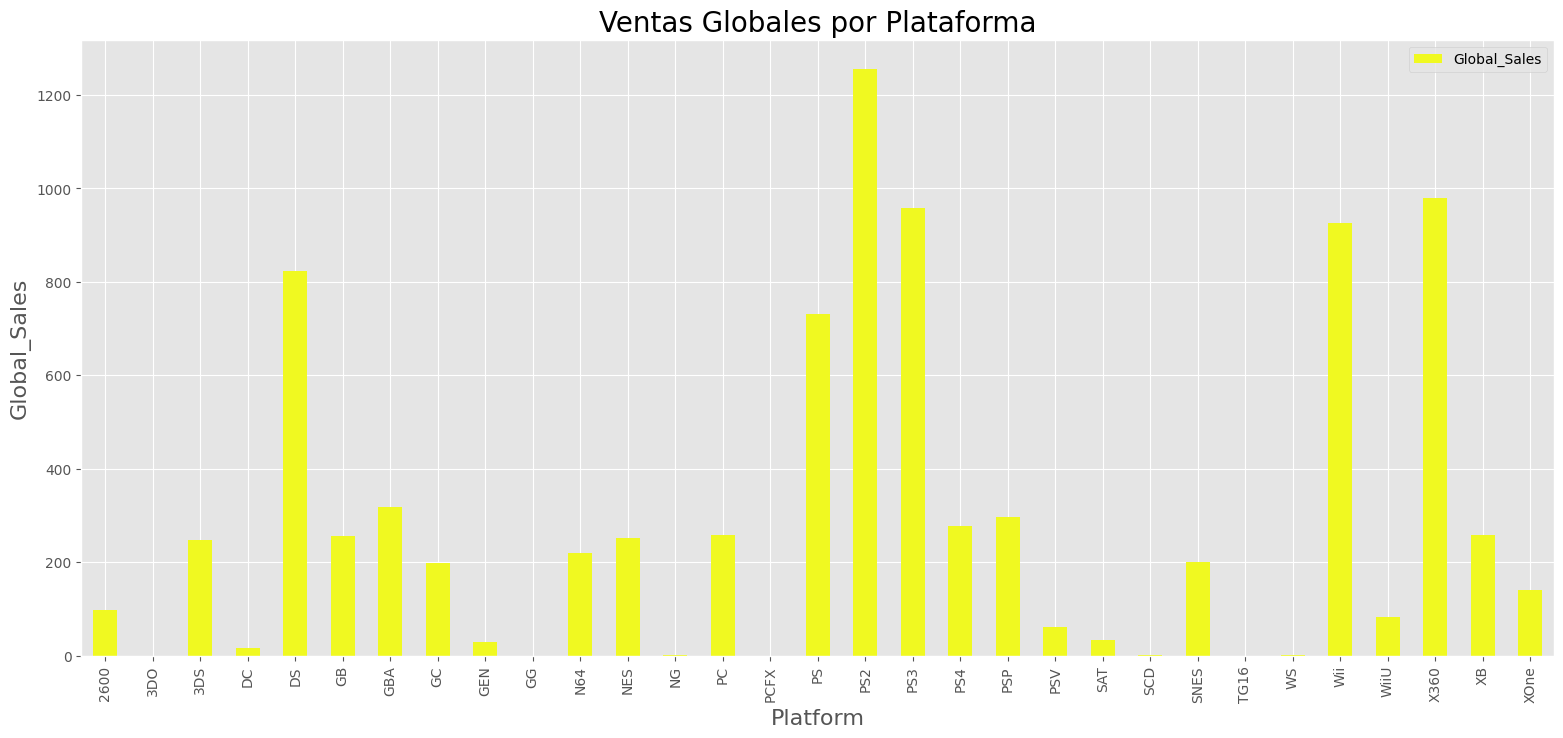

In [10]:
plt.rcParams['figure.figsize'] =(19,8) #otorgar parámetros a mi figura (figure (1), figsize = (x,x))
color = plt.cm.plasma(np.linspace(1, 0, 20))#cmap de python
pform_world = data.groupby(['Platform'])[['Global_Sales']].sum().plot.bar(color = color)
plt.title('Ventas Globales por Plataforma', fontsize = 20)
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Global_Sales', fontsize = 16)
plt.savefig('VentasGlobalesPlataforma.jpg') #.png
plt.show()

La grafica Indica que las 5 plataformas con más ventas globales son: 

1.   PS2
2.   XBOX360
3.   PS3
4.   Wii
5.   DS



In [11]:
comp = data[(data['Platform']=='X360')].sum()
print(comp)
#comprobacion de que la suma total de vental globales es 979.96

Rank                                                      8466048
Name            Kinect Adventures!Grand Theft Auto VCall of Du...
Platform        X360X360X360X360X360X360X360X360X360X360X360X3...
Year                                                      2541905
Genre           MiscActionShooterShooterShooterShooterShooterA...
Publisher       Microsoft Game StudiosTake-Two InteractiveActi...
NA_Sales                                                   601.05
EU_Sales                                                   280.58
JP_Sales                                                    12.43
Other_Sales                                                 85.54
Global_Sales                                               979.96
dtype: object


Numero de ventas de cada genero de videojuego

In [12]:
Genre_Sales = data.groupby(['Genre'])[['Global_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
print(Genre_Sales)

              Global_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                      
Action             1751.18    525.00    159.95       187.38
Adventure           239.04     64.13     52.07        16.81
Fighting            448.91    101.32     87.35        36.68
Misc                809.96    215.98    107.76        75.32
Platform            831.37    201.63    130.77        51.59
Puzzle              244.95     50.78     57.31        12.55
Racing              732.04    238.39     56.69        77.27
Role-Playing        927.37    188.06    352.31        59.61
Shooter            1037.37    313.27     38.28       102.69
Simulation          392.20    113.38     63.70        31.52
Sports             1330.93    376.85    135.37       134.97
Strategy            175.12     45.34     49.46        11.36


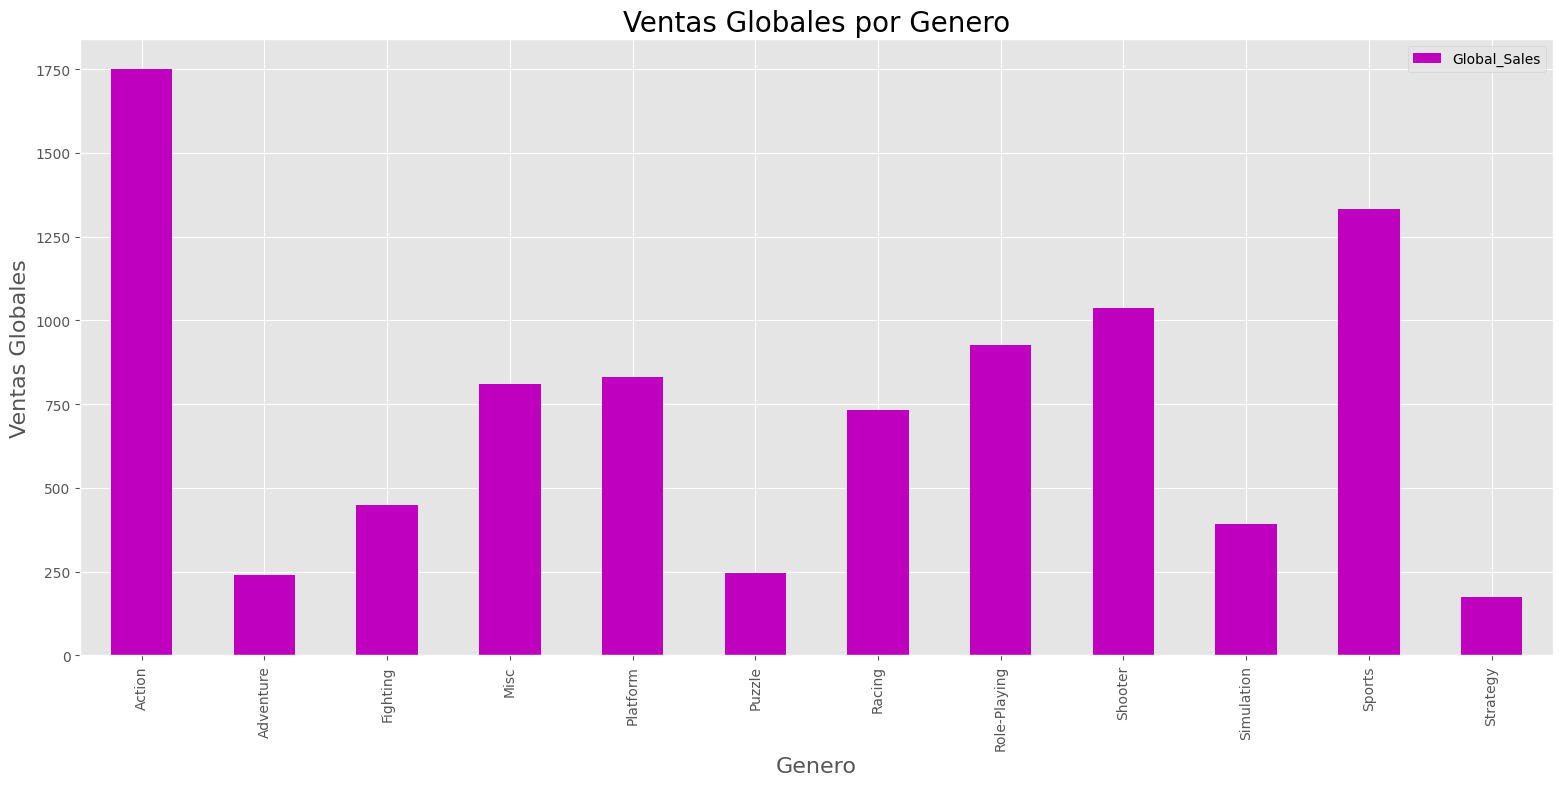

In [13]:
plt.rcParams['figure.figsize'] =(19,8) #otorgar parámetros a mi figura (figure (1), figsize = (x,x))
color = plt.cm.plasma(np.linspace(1, 0, 10))#cmap de python
pform_world = data.groupby(['Genre'])[['Global_Sales']].sum().plot.bar(color = 'm')
plt.title('Ventas Globales por Genero', fontsize = 20)
plt.xlabel('Genero',fontsize = 16)
plt.ylabel('Ventas Globales', fontsize = 16)
plt.savefig('VentasGlobalesGenero.jpg')
plt.show()

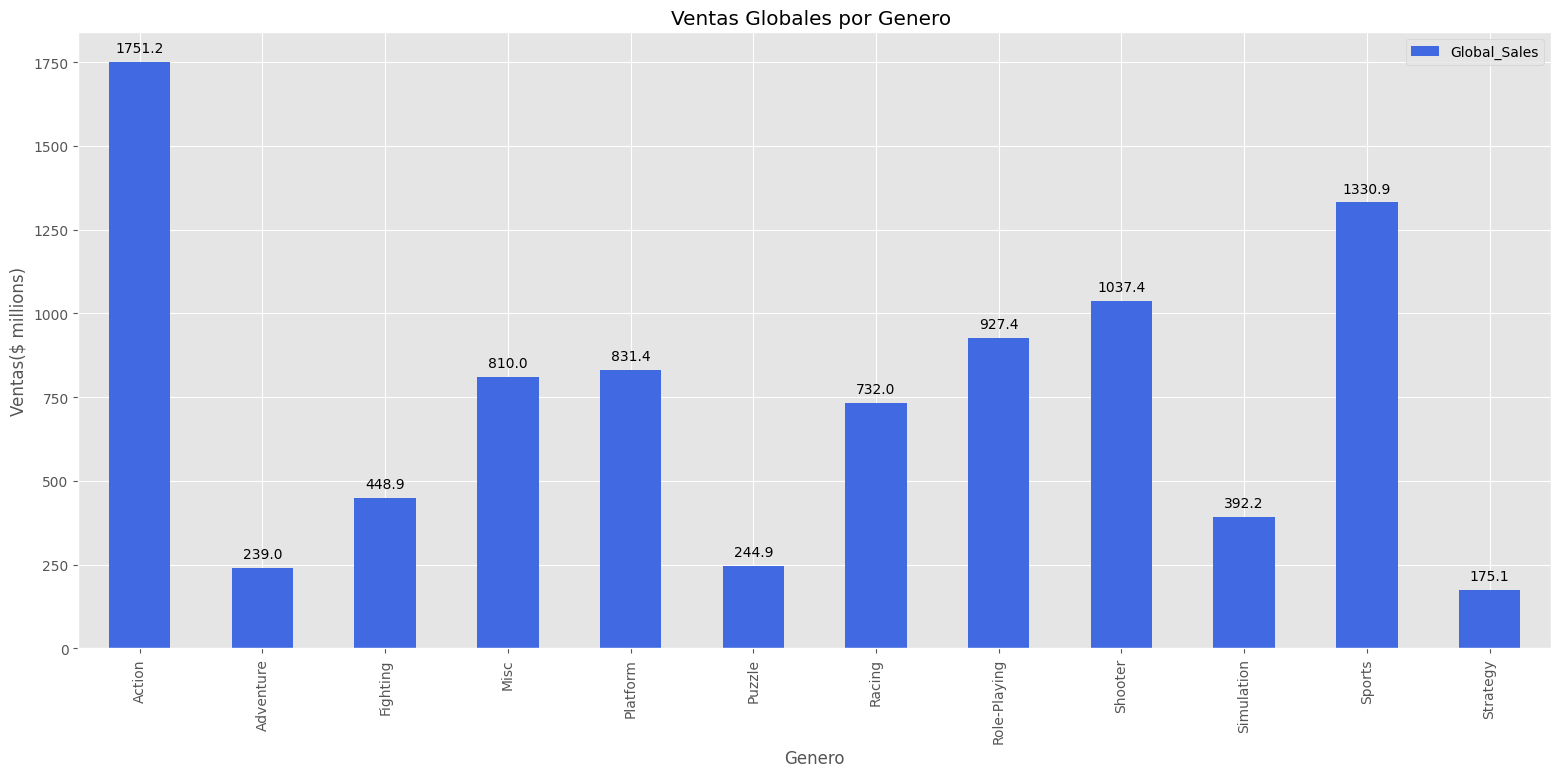

In [14]:
ax = pform_world = data.groupby(['Genre'])[['Global_Sales']].sum().plot(kind='bar', color = 'royalblue')
ax.set_title('Ventas Globales por Genero ')
ax.set_xlabel('Genero')
ax.set_ylabel('Ventas($ millions)')
#ax.set_xticklabels(x_labels)

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.savefig("VentasGlobalesGenero.jpg")

Numero de ventas en cada año determinado

In [15]:
Year_Sales = data.groupby(['Year'])[['Global_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
print(Year_Sales)

      Global_Sales  EU_Sales  JP_Sales  Other_Sales
Year                                               
1980         11.38      0.67      0.00         0.12
1981         35.77      1.96      0.00         0.32
1982         28.86      1.65      0.00         0.31
1983         16.79      0.80      8.10         0.14
1984         50.36      2.10     14.27         0.70
1985         53.94      4.74     14.56         0.92
1986         37.07      2.84     19.81         1.93
1987         21.74      1.41     11.63         0.20
1988         47.22      6.59     15.76         0.99
1989         73.45      8.44     18.36         1.50
1990        149.47     32.64     21.60        10.14
1991         32.23      3.95     14.78         0.74
1992         76.16     11.71     28.91         1.65
1993         45.98      4.65     25.33         0.89
1994         79.17     14.88     33.99         2.20
1995         88.11     14.90     45.75         2.64
1996        199.15     47.26     57.44         7.69
1997        

In [16]:
comp1 = data[(data['Year']==2015)].sum()
print(comp1)
#commprobacion

Rank                                                      6015847
Name            Call of Duty: Black Ops 3FIFA 16Star Wars Batt...
Platform        PS4PS4PS4XOnePS4WiiUPS4XOneXOnePS4PS4PS4XOnePS...
Year                                                      1237210
Genre           ShooterSportsShooterShooterRole-PlayingShooter...
Publisher       ActivisionElectronic ArtsElectronic ArtsActivi...
NA_Sales                                                   102.82
EU_Sales                                                    97.71
JP_Sales                                                    33.72
Other_Sales                                                 30.01
Global_Sales                                               264.44
dtype: object


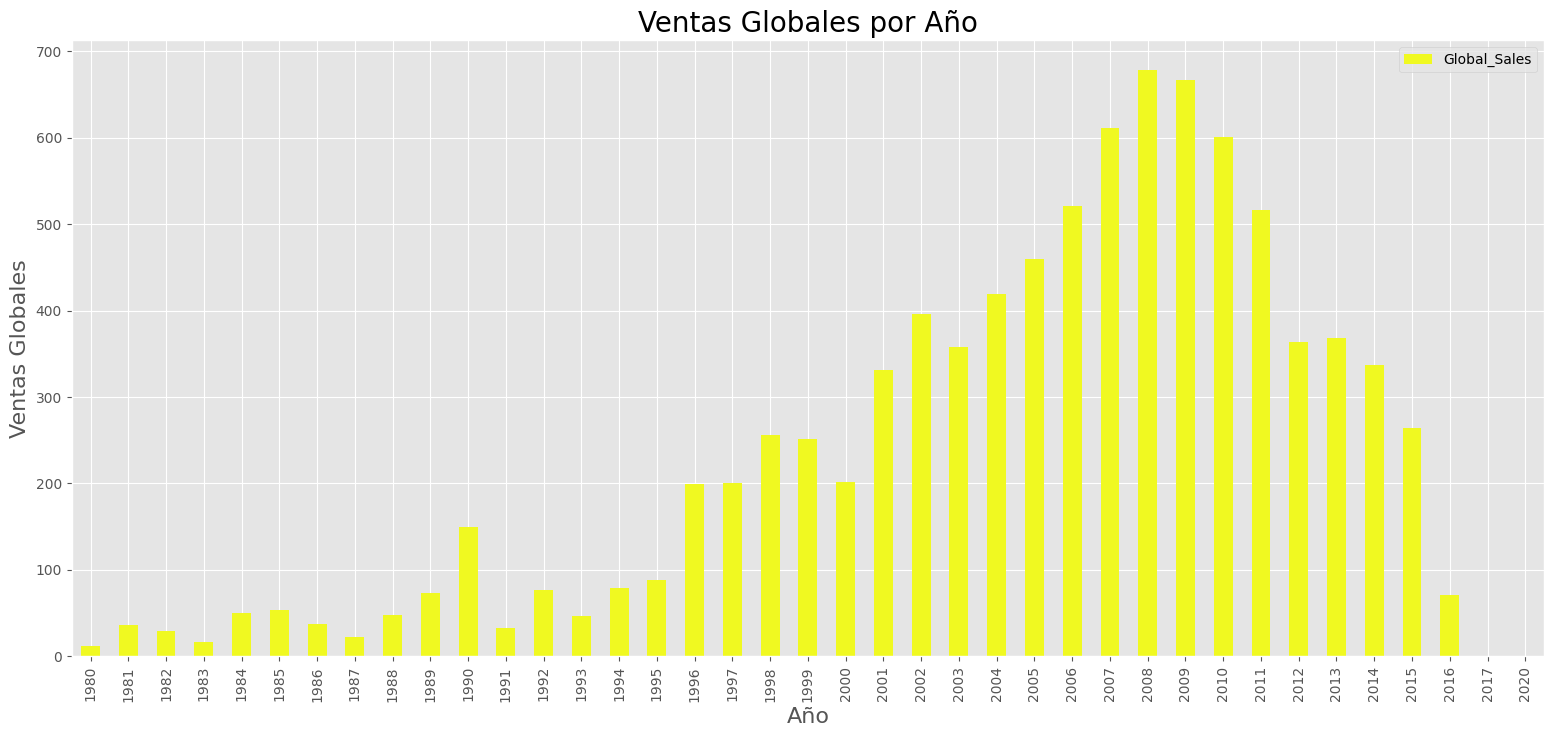

In [17]:
Year_Sales = data.groupby(['Year'])[['Global_Sales']].sum().plot.bar(color = color)
plt.rcParams['figure.figsize'] =(19,8) #otorgar parámetros a mi figura (figure (1), figsize = (x,x))
color = plt.cm.plasma(np.linspace(1, 0, 20))#cmap de python
plt.title('Ventas Globales por Año', fontsize = 20)
plt.xlabel('Año',fontsize = 16)
plt.ylabel('Ventas Globales', fontsize = 16)
plt.savefig('VentasGlobalesAño.jpg')
plt.show()

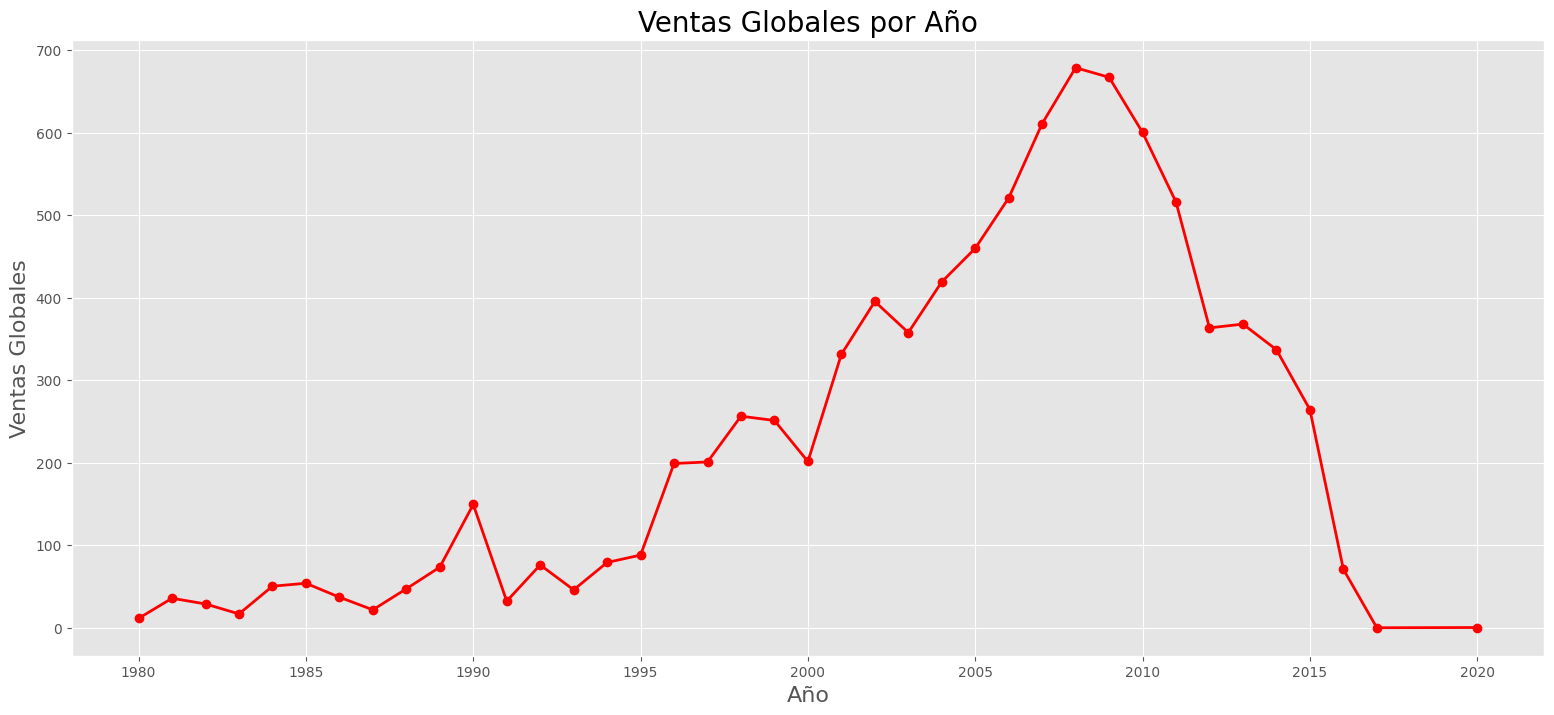

In [18]:
y = data.groupby(['Year'])[['Global_Sales']].sum()
plt.plot(y,linewidth=2.0,color = 'red', marker = 'o')
plt.title('Ventas Globales por Año', fontsize = 20)
plt.xlabel('Año',fontsize = 16)
plt.ylabel('Ventas Globales', fontsize = 16)
plt.savefig('VentasGlobalesAño1.jpg')
plt.show()

##Video juego más vendido en un año en especifico

In [19]:
vg_year = data.loc[(data['Year']==2008),['Year','Name','Global_Sales']]
print(vg_year)

       Year                                              Name  Global_Sales
2      2008                                    Mario Kart Wii         35.82
39     2008                           Super Smash Bros. Brawl         13.04
51     2008                               Grand Theft Auto IV         11.02
56     2008                               Grand Theft Auto IV         10.57
88     2008                          Pokémon Platinum Version          7.84
...     ...                                               ...           ...
16575  2008                             Neo Angelique Special          0.01
16580  2008                                         Real Rode          0.01
16588  2008                                  Mega Brain Boost          0.01
16592  2008                                          Plushees          0.01
16595  2008  SCORE International Baja 1000: The Official Game          0.01

[1428 rows x 3 columns]


In [20]:
vg_2008 = data.loc[(data['Year']==2008) & (data['Global_Sales']>=7.31),['Year','Name','Global_Sales']]
print(vg_2008)

    Year                        Name  Global_Sales
2   2008              Mario Kart Wii         35.82
39  2008     Super Smash Bros. Brawl         13.04
51  2008         Grand Theft Auto IV         11.02
56  2008         Grand Theft Auto IV         10.57
88  2008    Pokémon Platinum Version          7.84
98  2008  Call of Duty: World at War          7.37


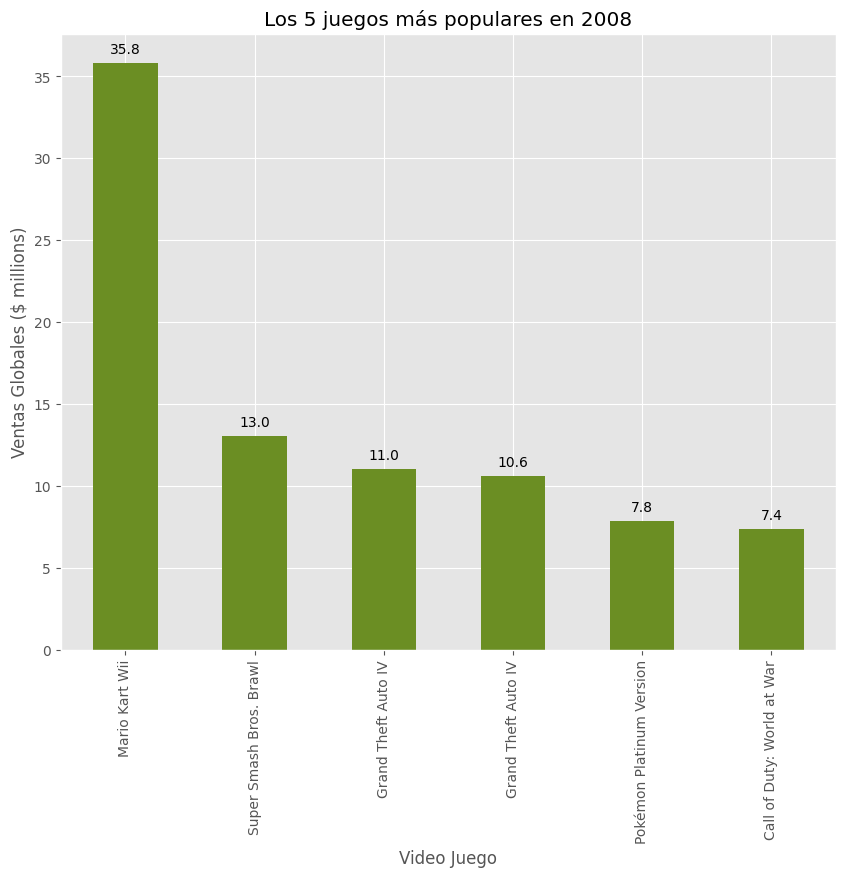

In [21]:
#vg_2008.plot.bar(x='Name', y ='Global_Sales', figsize =(10,8),legend = False)
ax = vg_2008.plot(kind='bar',x='Name', y ='Global_Sales', figsize =(10,8),legend = False, color = 'olivedrab')
ax.set_title('Los 5 juegos más populares en 2008')
ax.set_xlabel('Video Juego')
ax.set_ylabel('Ventas Globales ($ millions)')
#ax.set_xticklabels(x_labels)

def add_value_labels(ax, spacing=5):
 
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

add_value_labels(ax)
plt.savefig('RankPopularidadJuego2008.jpg')
plt.show()

Genero de video juego más vendido en 2008

In [22]:
genre_year = data.loc[(data['Year']==2008),['Year','Genre','Global_Sales']]
print(genre_year)

       Year         Genre  Global_Sales
2      2008        Racing         35.82
39     2008      Fighting         13.04
51     2008        Action         11.02
56     2008        Action         10.57
88     2008  Role-Playing          7.84
...     ...           ...           ...
16575  2008     Adventure          0.01
16580  2008     Adventure          0.01
16588  2008        Puzzle          0.01
16592  2008    Simulation          0.01
16595  2008        Racing          0.01

[1428 rows x 3 columns]


In [24]:
genre_2008 = genre_year.groupby(['Genre'])['Global_Sales'].sum()
print(genre_2008)
#sumatoria de ventas de cada genero en 2008

Genre
Action          136.39
Adventure        25.02
Fighting         35.38
Misc             87.03
Platform         35.70
Puzzle           15.59
Racing           70.66
Role-Playing     59.83
Shooter          59.51
Simulation       46.76
Sports           95.34
Strategy         11.69
Name: Global_Sales, dtype: float64


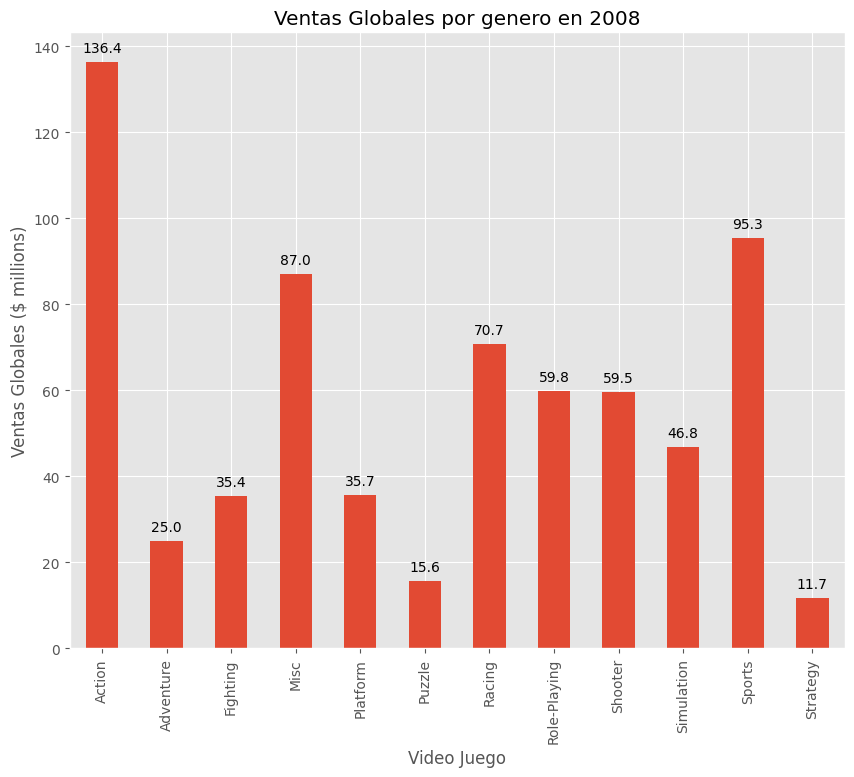

In [25]:
#genre_2008.plot.bar(x='Genre', y ='Global_Sales', figsize =(10,8),legend = False)
ax = genre_2008.plot(kind='bar', figsize =(10,8),legend = False)
ax.set_title('Ventas Globales por genero en 2008')
ax.set_xlabel('Video Juego')
ax.set_ylabel('Ventas Globales ($ millions)')

def add_value_labels(ax, spacing=5):
 
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

add_value_labels(ax)
plt.savefig('RankPopGenero.jpg')
plt.show()

Plataforma con mas ventas en 2008

In [26]:
vg_platform = data.loc[(data['Year']==2008),['Year','Platform','Global_Sales']]
print(vg_platform)

       Year Platform  Global_Sales
2      2008      Wii         35.82
39     2008      Wii         13.04
51     2008     X360         11.02
56     2008      PS3         10.57
88     2008       DS          7.84
...     ...      ...           ...
16575  2008      PSP          0.01
16580  2008      PS2          0.01
16588  2008       DS          0.01
16592  2008       DS          0.01
16595  2008      PS2          0.01

[1428 rows x 3 columns]


Historial de ventas por años de una plataforma en específico

In [27]:
Wii = data.loc[(data['Platform']=='Wii'),['Platform','Year','Global_Sales']]
print(Wii)

      Platform  Year  Global_Sales
0          Wii  2006         82.74
2          Wii  2008         35.82
3          Wii  2009         33.00
7          Wii  2006         29.02
8          Wii  2009         28.62
...        ...   ...           ...
16517      Wii  2007          0.01
16552      Wii  2007          0.01
16573      Wii  2007          0.01
16574      Wii  2008          0.01
16581      Wii  2011          0.01

[1325 rows x 3 columns]


In [28]:
Plataforma = data['Platform'].tolist()
Plataforma = pd.DataFrame(Plataforma, columns=['Platform'])
Año = data['Year'].tolist()
Año = pd.DataFrame(Año, columns=['Year'])
Ventas = data['Global_Sales'].tolist()
Ventas = pd.DataFrame(Ventas, columns=['Global_Sales'])
Genero = data['Genre'].tolist()
Genero = pd.DataFrame(Genero, columns=['Genre'])
Frames = [Plataforma,Genero,Año,Ventas]
Venta_plataforma = pd.concat(Frames, axis=1)
Venta_plataforma.head(10)

,Platform,Genre,Year,Global_Sales
0,Wii,Sports,2006,82.74
1,NES,Platform,1985,40.24
2,Wii,Racing,2008,35.82
3,Wii,Sports,2009,33.00
4,GB,Role-Playing,1996,31.37
5,GB,Puzzle,1989,30.26
6,DS,Platform,2006,30.01
7,Wii,Misc,2006,29.02
8,Wii,Platform,2009,28.62
9,NES,Shooter,1984,28.31


In [29]:
plat = Venta_plataforma.loc[(Venta_plataforma['Year']==2008),['Year','Platform','Global_Sales']]
print(plat)

       Year Platform  Global_Sales
2      2008      Wii         35.82
39     2008      Wii         13.04
51     2008     X360         11.02
56     2008      PS3         10.57
88     2008       DS          7.84
...     ...      ...           ...
16575  2008      PSP          0.01
16580  2008      PS2          0.01
16588  2008       DS          0.01
16592  2008       DS          0.01
16595  2008      PS2          0.01

[1428 rows x 3 columns]


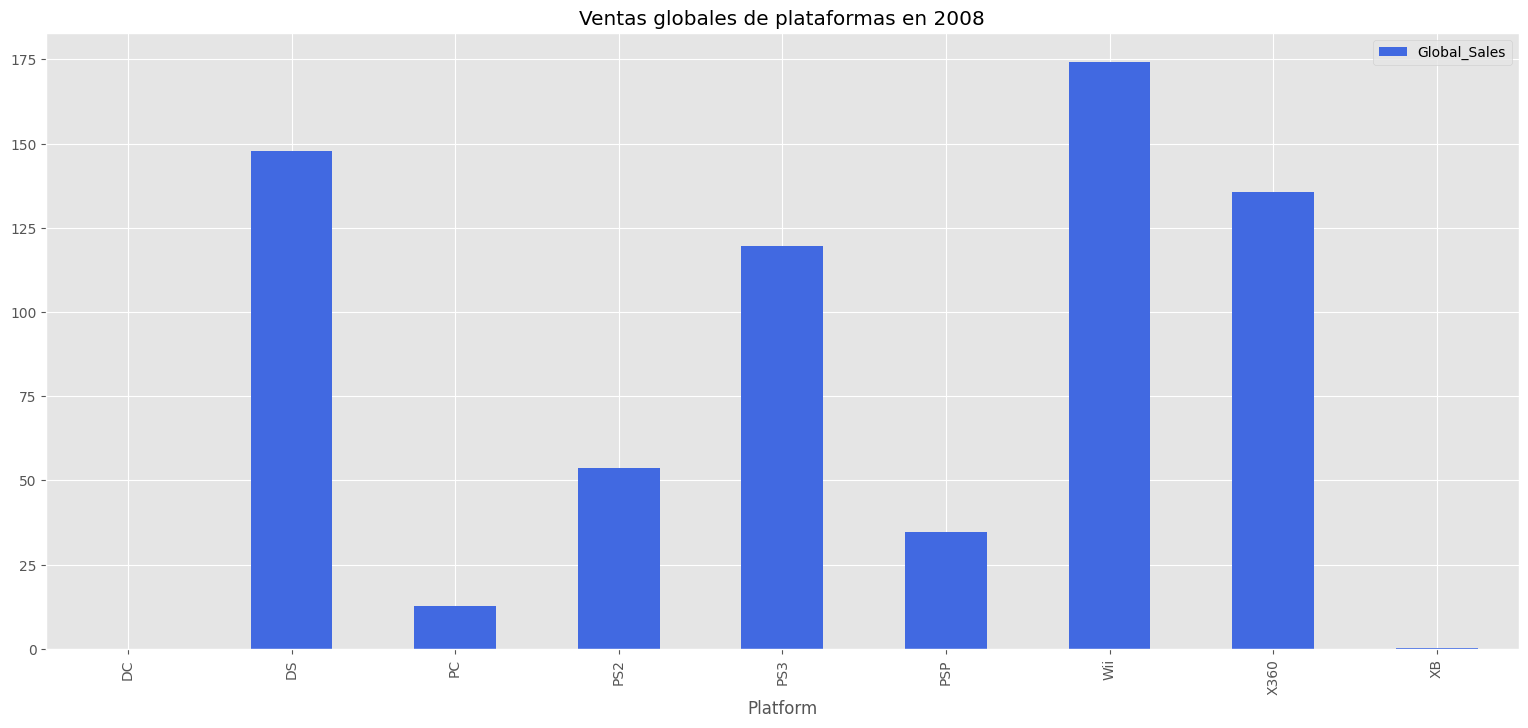

In [32]:
plat_2008 = plat.groupby(['Platform'])[['Global_Sales']].sum().plot.bar(color='royalblue')
plt.title("Ventas globales de plataformas en 2008")
plt.savefig('plataforma2008')
plt.show()

In [31]:
wii = Venta_plataforma.loc[Venta_plataforma['Platform']=='Wii']
print(wii)
                          

      Platform     Genre  Year  Global_Sales
0          Wii    Sports  2006         82.74
2          Wii    Racing  2008         35.82
3          Wii    Sports  2009         33.00
7          Wii      Misc  2006         29.02
8          Wii  Platform  2009         28.62
...        ...       ...   ...           ...
16517      Wii    Action  2007          0.01
16552      Wii  Fighting  2007          0.01
16573      Wii    Racing  2007          0.01
16574      Wii    Racing  2008          0.01
16581      Wii    Sports  2011          0.01

[1325 rows x 4 columns]


##Ventas de Wii

Total de ventas por año de Wii

In [33]:
venta_wii = wii.groupby(['Year'])[['Global_Sales']].sum()
print(venta_wii)

      Global_Sales
Year              
1990         16.90
2006        137.91
2007        154.97
2008        174.16
2009        210.44
2010        131.80
2011         62.41
2012         22.77
2013          9.36
2014          4.44
2015          1.55


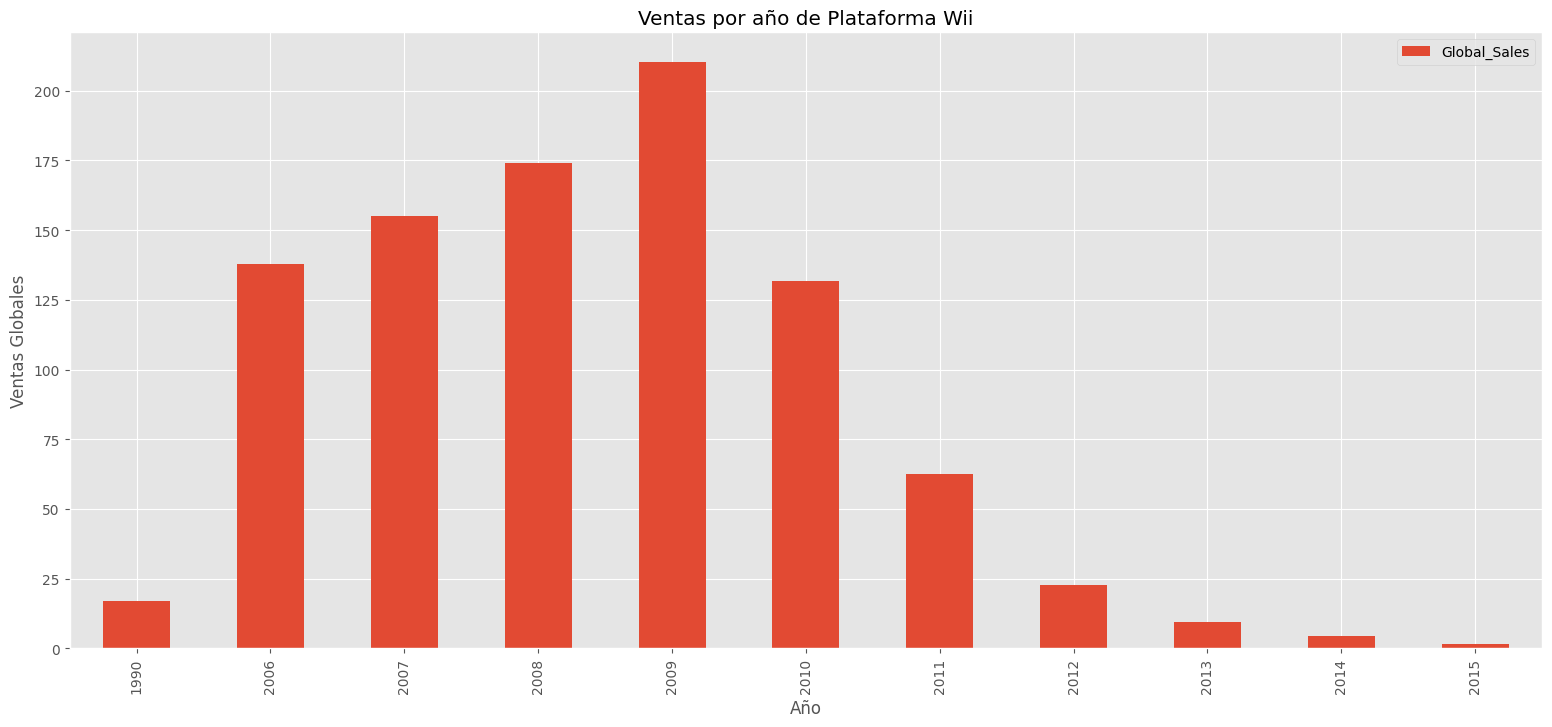

In [35]:
venta_wii = wii.groupby(['Year'])[['Global_Sales']].sum().plot.bar()
plt.title("Ventas por año de Plataforma Wii")
plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.savefig('VentasxAñoWii.jpg')
plt.show()

Observar ventas por genero de juego de Wii en 2008, su año 

---

de más ventas

In [36]:
wii_Games = Venta_plataforma.loc[(Venta_plataforma['Platform']=='Wii') & (Venta_plataforma['Year']==2009),
                                 ['Year','Genre','Global_Sales']]
print(wii_Games)                                

       Year      Genre  Global_Sales
3      2009     Sports         33.00
8      2009   Platform         28.62
14     2009     Sports         22.00
102    2009       Misc          7.27
233    2009     Sports          4.58
...     ...        ...           ...
15896  2009     Racing          0.02
16097  2009     Racing          0.01
16210  2009     Puzzle          0.01
16338  2009  Adventure          0.01
16417  2009     Puzzle          0.01

[325 rows x 3 columns]


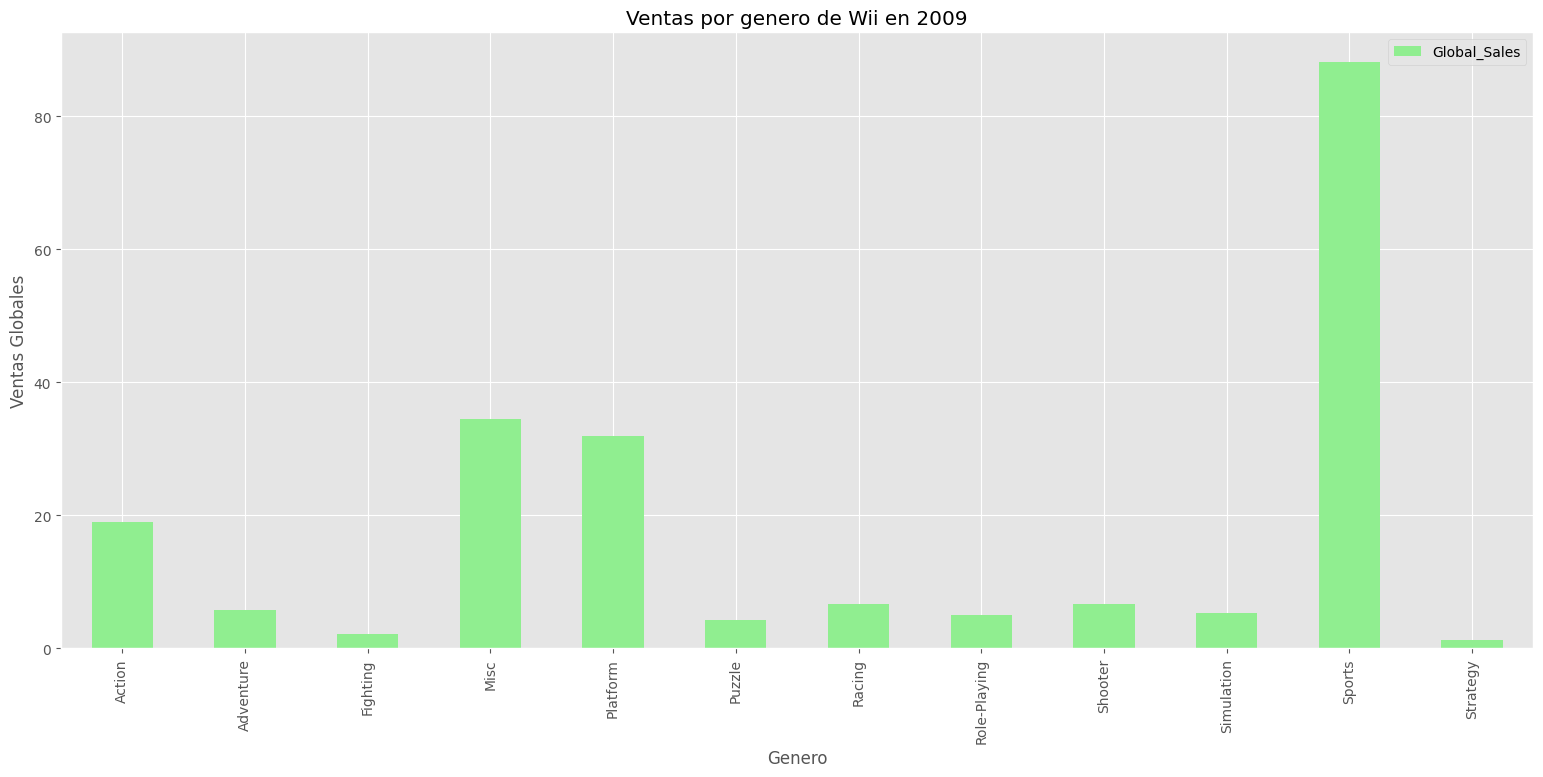

In [37]:
genre_2008 = wii_Games.groupby(['Genre'])[['Global_Sales']].sum().plot.bar(color = 'lightgreen')
plt.title("Ventas por genero de Wii en 2009")
plt.xlabel('Genero')
plt.ylabel('Ventas Globales')
plt.savefig('VentasWii2008Genero.jpg')
plt.show()

In [38]:
wii_Games2 = data.loc[(data['Platform']=='Wii') & (data['Year']==2009) & (data['Global_Sales']>=3.27),
                                 ['Year','Name','Global_Sales']]
print(wii_Games2)

     Year                                       Name  Global_Sales
3    2009                          Wii Sports Resort         33.00
8    2009                  New Super Mario Bros. Wii         28.62
14   2009                               Wii Fit Plus         22.00
102  2009                                 Just Dance          7.27
233  2009  Mario & Sonic at the Olympic Winter Games          4.58
303  2009                           EA Sports Active          3.92


Observar ventas por genero de Wii en 2010, Ventas comenzaron a disminuir

In [39]:
wii_Games = Venta_plataforma.loc[(Venta_plataforma['Platform']=='Wii') & (Venta_plataforma['Year']==2010),
                                 ['Year','Genre','Global_Sales']]
print(wii_Games)

       Year      Genre  Global_Sales
68     2010       Misc          9.52
78     2010       Misc          8.49
91     2010   Platform          7.69
117    2010     Sports          6.81
125    2010   Platform          6.59
...     ...        ...           ...
15884  2010     Racing          0.02
16190  2010       Misc          0.01
16284  2010       Misc          0.01
16365  2010  Adventure          0.01
16437  2010     Sports          0.01

[254 rows x 3 columns]


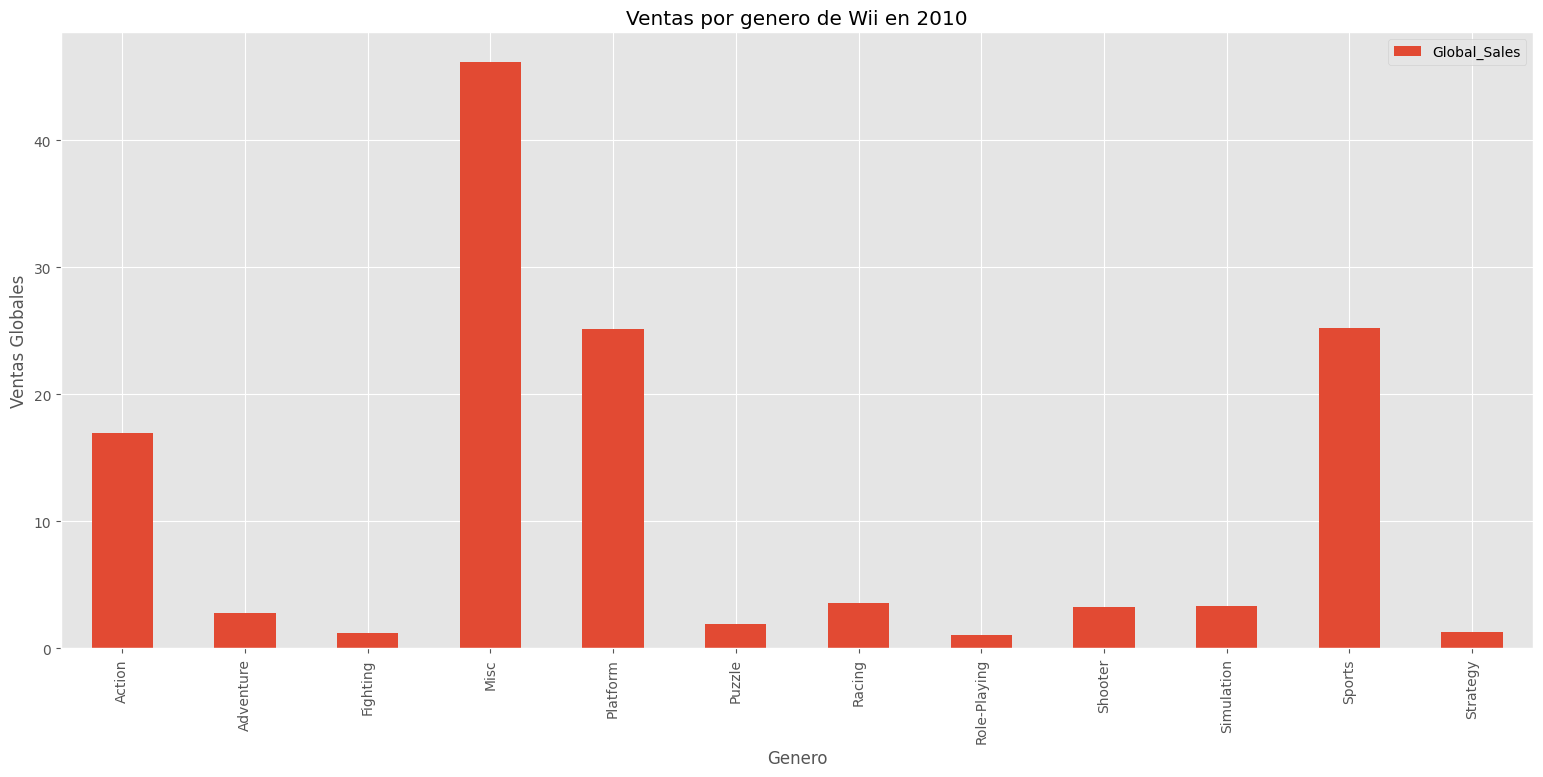

In [40]:
genre_2009 = wii_Games.groupby(['Genre'])[['Global_Sales']].sum().plot.bar()
plt.title("Ventas por genero de Wii en 2010")
plt.xlabel('Genero')
plt.ylabel('Ventas Globales')
plt.savefig('VentasWii2010Genero.jpg')
plt.show()

## Ventas de Nintendo DS (2008)

In [41]:
DS = Venta_plataforma.loc[(Venta_plataforma['Platform']=='DS') & (Venta_plataforma['Year']==2008),
                          ]
print(DS)

      Platform         Genre  Year  Global_Sales
88          DS  Role-Playing  2008          7.84
189         DS        Sports  2008          5.14
380         DS          Misc  2008          3.48
399         DS        Puzzle  2008          3.36
432         DS          Misc  2008          3.17
...        ...           ...   ...           ...
16515       DS  Role-Playing  2008          0.01
16525       DS  Role-Playing  2008          0.01
16527       DS     Adventure  2008          0.01
16588       DS        Puzzle  2008          0.01
16592       DS    Simulation  2008          0.01

[492 rows x 4 columns]


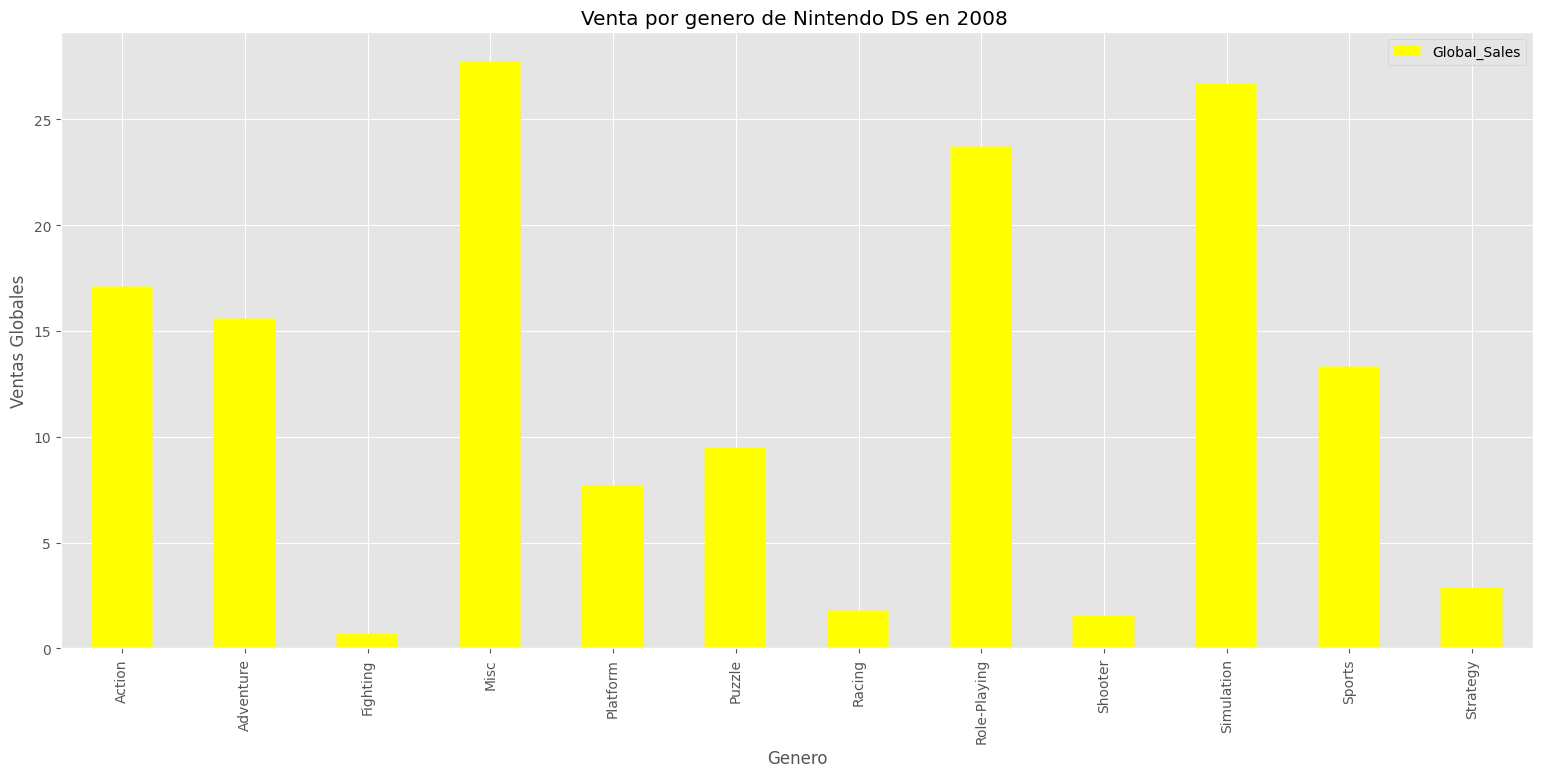

In [42]:
DS_group = DS.groupby(['Genre'])[['Global_Sales']].sum().plot.bar(color='Yellow')
plt.title("Venta por genero de Nintendo DS en 2008 ")                                                                      
plt.xlabel('Genero')
plt.ylabel('Ventas Globales')
plt.savefig('VentasDS2008Genero.jpg')
plt.show()

In [43]:
DS_group = DS.groupby(['Genre'])[['Global_Sales']].sum()
print(DS_group)

              Global_Sales
Genre                     
Action               17.07
Adventure            15.54
Fighting              0.67
Misc                 27.72
Platform              7.65
Puzzle                9.46
Racing                1.76
Role-Playing         23.69
Shooter               1.54
Simulation           26.67
Sports               13.29
Strategy              2.83


##Ventas de PS2

In [44]:
ps2 = Venta_plataforma.loc[Venta_plataforma['Platform']=='PS2']
print(ps2)

      Platform      Genre  Year  Global_Sales
17         PS2     Action  2004         20.81
24         PS2     Action  2002         16.15
28         PS2     Racing  2001         14.98
38         PS2     Action  2001         13.10
47         PS2     Racing  2004         11.66
...        ...        ...   ...           ...
16559      PS2  Adventure  2008          0.01
16561      PS2  Adventure  2008          0.01
16572      PS2  Adventure  2008          0.01
16580      PS2  Adventure  2008          0.01
16595      PS2     Racing  2008          0.01

[2161 rows x 4 columns]


In [45]:
venta_ps2 = ps2.groupby(['Year'])[['Global_Sales']].sum()
print(venta_ps2)

      Global_Sales
Year              
1990         22.18
2000         39.11
2001        166.43
2002        205.40
2003        184.29
2004        211.78
2005        160.65
2006        103.42
2007         76.00
2008         53.83
2009         26.45
2010          5.63
2011          0.47


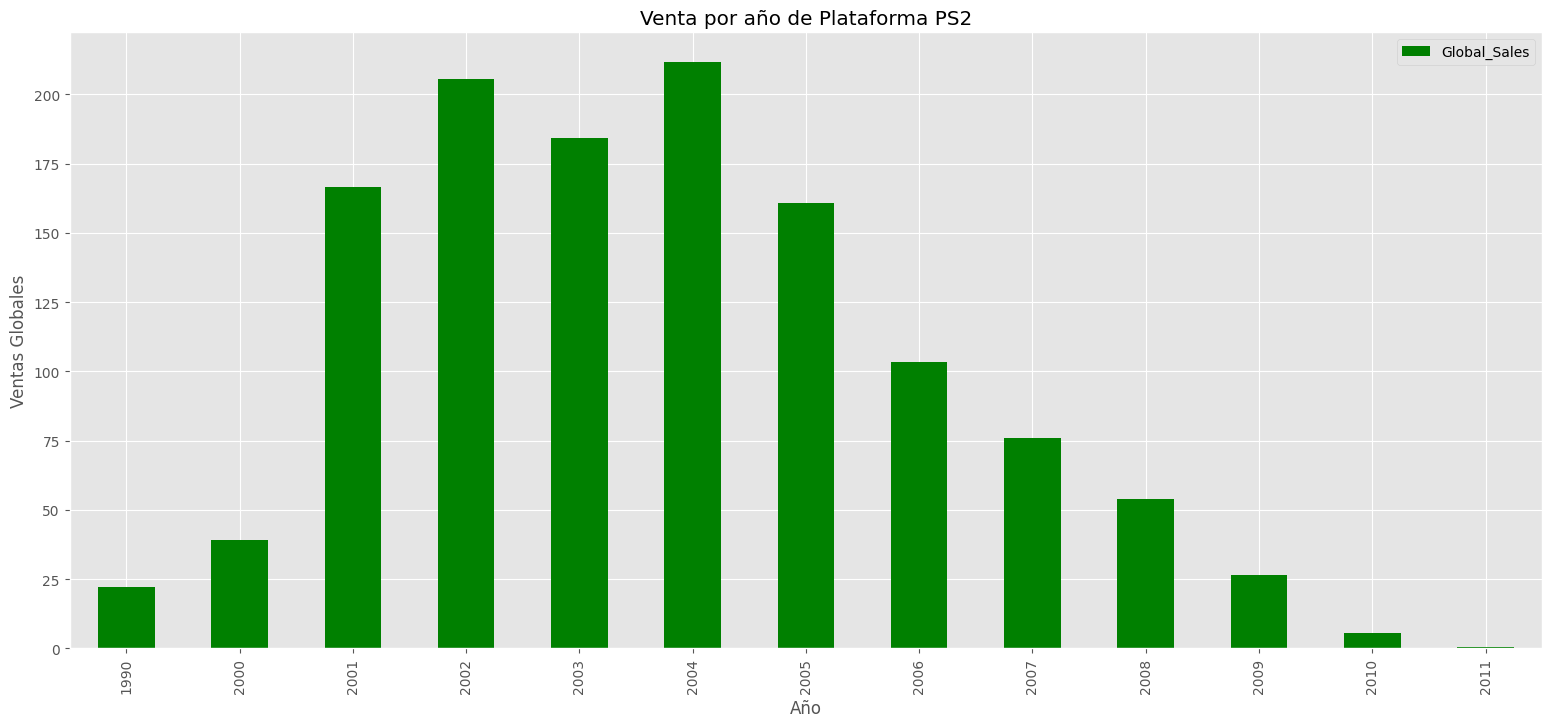

In [46]:
ps2.groupby(['Year'])[['Global_Sales']].sum().plot.bar(color = 'g')
plt.title("Venta por año de Plataforma PS2")
plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.show()

Ventas de cada genero de ps2 en su año de más ventas, 2004 

In [47]:
ps2_Games = Venta_plataforma.loc[(Venta_plataforma['Platform']=='PS2') & (Venta_plataforma['Year']==2004),
                                 ['Year','Genre','Global_Sales']]
print(ps2_Games)  

       Year         Genre  Global_Sales
17     2004        Action         20.81
47     2004        Racing         11.66
113    2004        Racing          6.90
180    2004  Role-Playing          5.21
238    2004        Sports          4.53
...     ...           ...           ...
15018  2004    Simulation          0.02
15222  2004     Adventure          0.02
15425  2004      Platform          0.02
15662  2004       Shooter          0.02
16330  2004      Fighting          0.01

[259 rows x 3 columns]


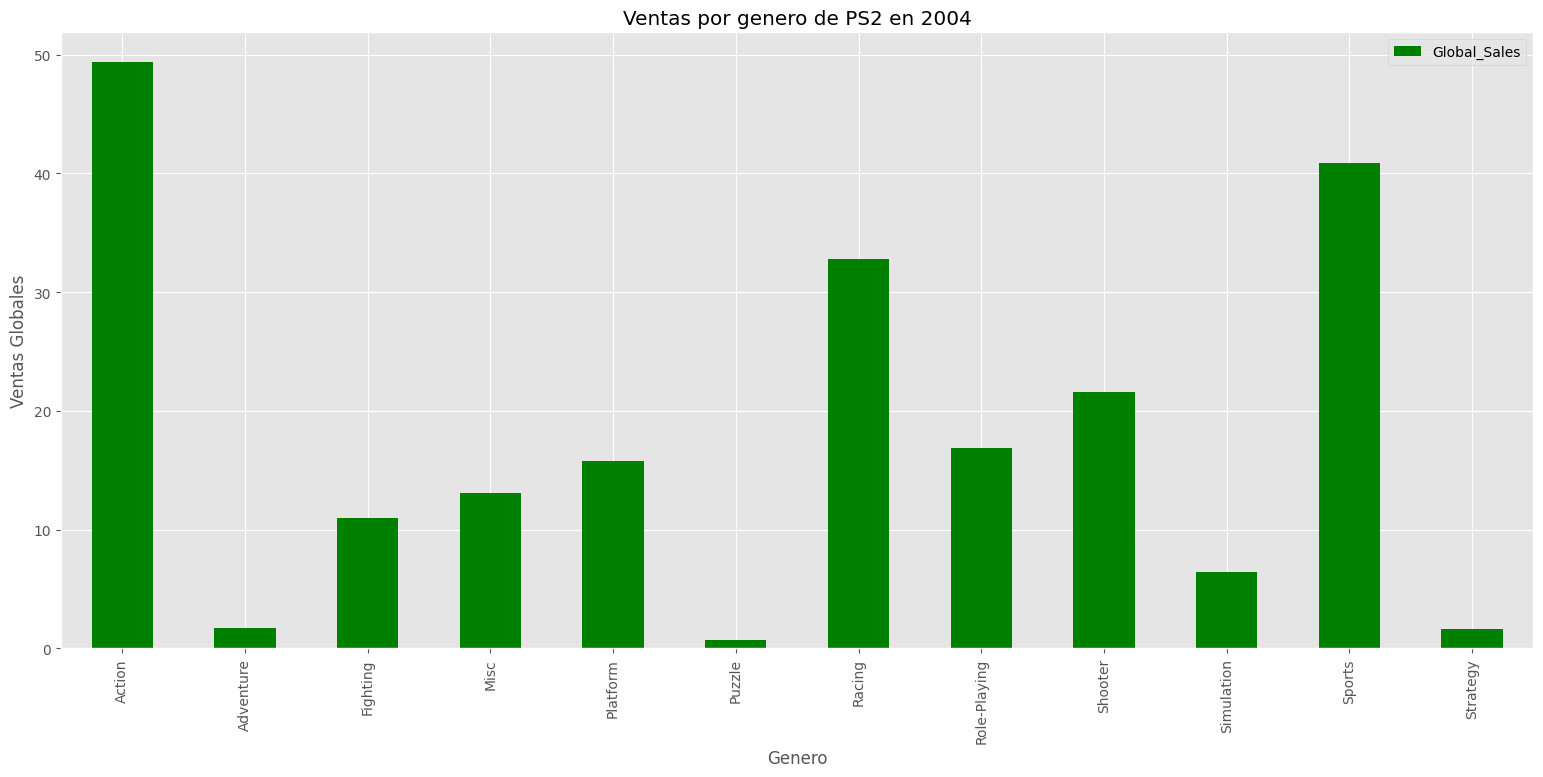

In [48]:
genre_2004 = ps2_Games.groupby(['Genre'])[['Global_Sales']].sum().plot.bar(color = 'g')
plt.title("Ventas por genero de PS2 en 2004")
plt.xlabel('Genero')
plt.ylabel('Ventas Globales')
plt.show()

In [49]:
#ventas de cada genero en el 2004
ps2.groupby(['Genre'])[['Global_Sales']].sum()

,Global_Sales
Genre,
Action,272.76
Adventure,21.16
Fighting,92.60
Misc,101.14
Platform,72.51
Puzzle,5.90
Racing,156.28
Role-Playing,93.50
Shooter,108.57


In [50]:
Year_platform = data.groupby(['Year'])[['Global_Sales','Platform']].sum()
print(Year_platform)

      Global_Sales
Year              
1980         11.38
1981         35.77
1982         28.86
1983         16.79
1984         50.36
1985         53.94
1986         37.07
1987         21.74
1988         47.22
1989         73.45
1990        149.47
1991         32.23
1992         76.16
1993         45.98
1994         79.17
1995         88.11
1996        199.15
1997        200.98
1998        256.47
1999        251.27
2000        201.56
2001        331.47
2002        395.52
2003        357.85
2004        419.31
2005        459.94
2006        521.04
2007        611.13
2008        678.90
2009        667.30
2010        600.45
2011        515.99
2012        363.54
2013        368.11
2014        337.05
2015        264.44
2016         70.93
2017          0.05
2020          0.29


<ipython-input-50-3cf15d1d8955>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Year_platform = data.groupby(['Year'])[['Global_Sales','Platform']].sum()
